In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

In [4]:
def get_graph_from_data_file(file_name='lesmis.txt', ncols=3):
    
    '''
    Defines a NetworkX graph based on data from file. 
    Plots a visual representation of the graph 
    '''
    
    file_path = 'data/' + file_name
    
    if ncols == 2:
        G = nx.read_edgelist("data/powergrid.txt", nodetype=int)
    else:
        G = nx.read_edgelist(file_path, nodetype=int, data=(('weight', float),))
        
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color='b', node_size=50, with_labels=False)
    
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    
    return G

Number of edges: 77. Number of nodes: 77.


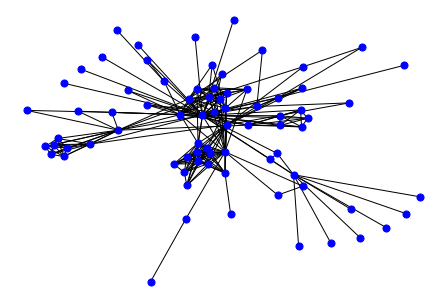

In [5]:
G = get_graph_from_data_file('lesmis.txt')

In [10]:
# Calculate degree related measures

def print_graph_data(G):
    print('Number of edges: {}. Number of nodes: {}.'.format(len(G), G.number_of_nodes()))
    vk = list(dict(G.degree()).values())
    vk = np.array(vk)
    #print('Graph\'s degree: {}.'.format(vk))
    print('Graph\'s mean degree: {}'.format(np.mean(vk)))

def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

def momment_of_degree_distribution2(G,m):
    'Moment of order m'
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

def normalized_shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H/math.log(len(G),2)

# Transitivity and Clustering
def get_transitivity_data(G):
    CC = (nx.transitivity(G)) 

    avc = nx.average_clustering(G)

    vcc = []
    for i in G.nodes():
        vcc.append(nx.clustering(G, i))
    vcc= np.array(vcc)

    return [CC, avc, vcc]

def complexty_coeficient(G):
    return momment_of_degree_distribution(G, 2)/momment_of_degree_distribution(G,1)

ks, Pk = degree_distribution(G)

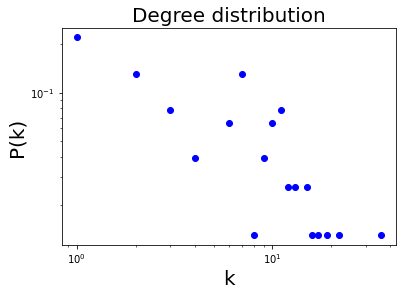

In [30]:
fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
#plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

In [43]:
k1 = momment_of_degree_distribution(G,1)
print("Mean degree = ", np.mean(vk))
print("First moment of the degree distribution = ", k1)

k2 = momment_of_degree_distribution(G,2)
print("Second moment of the degree distribution = ", k2)

variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
print("Variance of the degree = ", variance)

H = shannon_entropy(G)
print("Shannon Entropy = ", "%3.4f"%H)

H = normalized_shannon_entropy(G)
print("Normalized Shannon Entropy = ", "%3.4f"%H)

Mean degree =  6.597402597402597
First moment of the degree distribution =  6.597402597402597
Second moment of the degree distribution =  79.53246753246754
Variance of the degree =  36.006746500252994
Shannon Entropy =  3.5957
Normalized Shannon Entropy =  0.5738


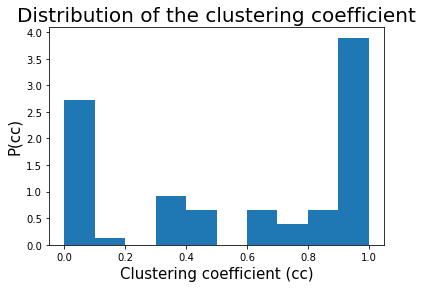

In [49]:
plt.figure()
plt.hist(vcc, bins  = 10, density=True)
plt.title("Distribution of the clustering coefficient", fontsize=20)
plt.ylabel("P(cc)", fontsize=15)
plt.xlabel("Clustering coefficient (cc)", fontsize=15)
#plt.grid(True)
plt.savefig('clustering.eps') #save the figure into a file
plt.show()

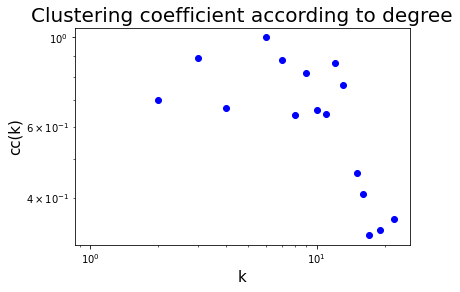

In [51]:
#Average clustering for each degree k
ck = list()
ks = list()
for k in np.arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(vcc[aux]) > 0):
        cm = np.mean(vcc[aux]) #average clustering among all the nodes with degree k
        ck.append(cm)
        ks.append(k)
plt.loglog(ks,ck,'bo')
plt.title("Clustering coefficient according to degree", fontsize=20)
plt.ylabel("cc(k)", fontsize=15)
plt.xlabel("k", fontsize=15)
#plt.grid(True)
plt.savefig('cck.eps')
plt.show(True)

In [54]:
# Exercises:
print(int(momment_of_degree_distribution2(G, 3)))
print(int(momment_of_degree_distribution2(G, 4)))

1408
33592


Number of edges: 4941. Number of nodes: 4941.


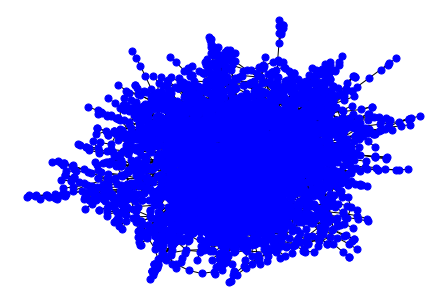

In [8]:
G = get_graph_from_data_file('powergrid.txt', 2)

In [11]:
complexty_coeficient(G)

3.8712465878070974